In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('time_data/walmart_stock.csv', index_col='Date', parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


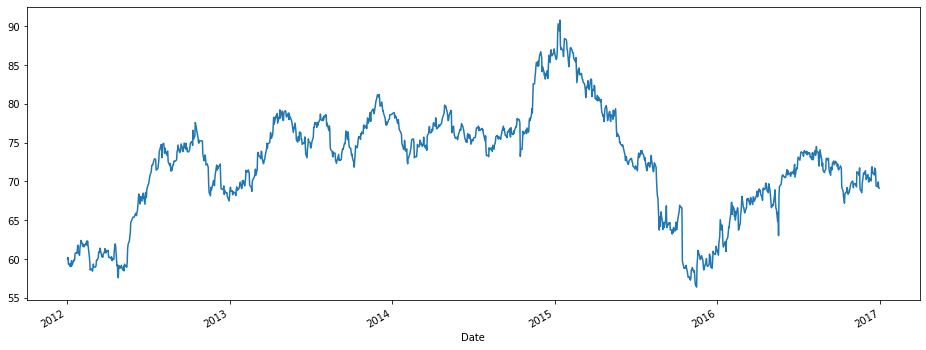

In [4]:
# a basic line chart of opening stock prices
df['Open'].plot(figsize=(16,6))

In [5]:
# the above has a lot of individual data points and a degree of noise 
# this is how you do a "rolling mean" or "moving average" for a specified period
# first to show the dataframe, you can see that the first 7 rows are blank because the average isn't complete yet
# the data displayed in row number 7 is the moving average of 7 rows.  This smooths out the data
df.rolling(7).mean().head(15)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


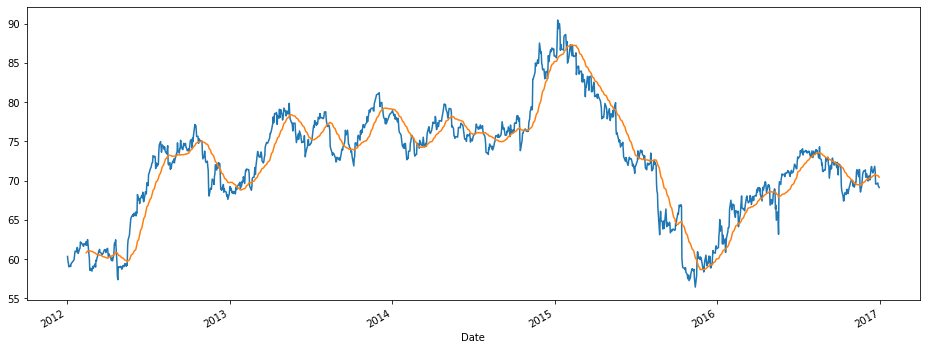

In [7]:
# to plot this out with both lines
df['Close'].plot(figsize=(16,6))
# this line puts in a 30 day moving average
df['Close'].rolling(window=30).mean().plot()

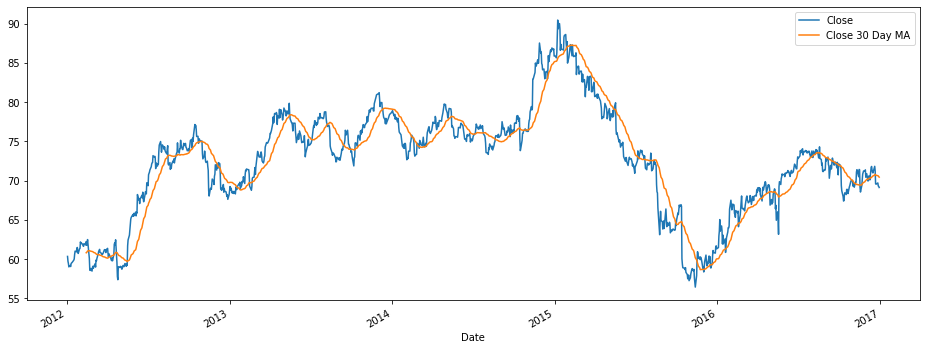

In [10]:
# to put in a legend, you can make a dataframe of the computed values and base values and plot that new dataframe
# first add the column to the existing dataframe (inplace=False)
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
# then plot the two columns - with multiple values plotted, pyplot automatically puts in a legend
df[['Close', 'Close 30 Day MA']].plot(figsize=(16,6))

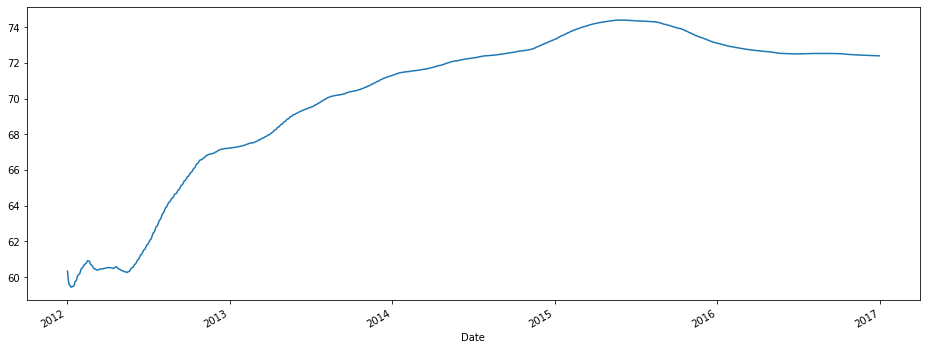

In [11]:
# can also do a cumulative mean of price movements using the expanding command
df['Close'].expanding().mean().plot(figsize=(16,6))

## Bollinger Bands
A measure of volatility for charting

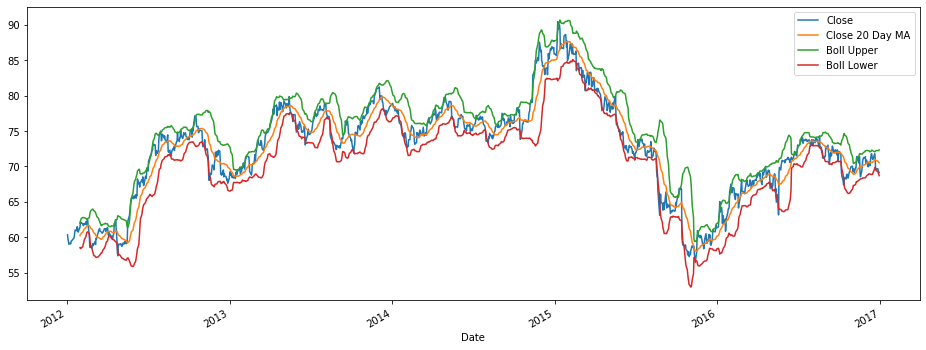

In [12]:
# need to create three new columns in the dataframe
# Close 20 Day MA
df['Close 20 Day MA'] = df['Close'].rolling(20).mean()

# Boll Upper = 20 MA + 2 * std(20)
df['Boll Upper'] = df['Close 20 Day MA'] + 2 * (df['Close'].rolling(20).std())

# Boll Lower = 20 MA - 2 * std(20)
df['Boll Lower'] = df['Close 20 Day MA'] - 2 * (df['Close'].rolling(20).std())

# now plot it all
df[['Close', 'Close 20 Day MA', 'Boll Upper', 'Boll Lower']].plot(figsize=(16,6))

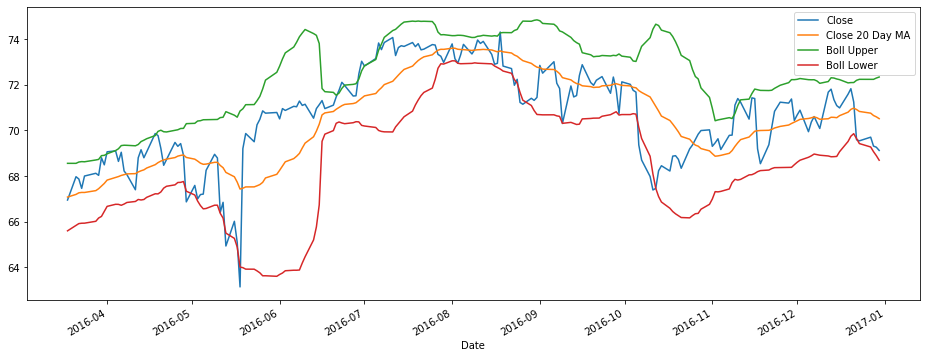

In [15]:
# need to create three new columns in the dataframe
# Close 20 Day MA
df['Close 20 Day MA'] = df['Close'].rolling(20).mean()

# Boll Upper = 20 MA + 2 * std(20)
df['Boll Upper'] = df['Close 20 Day MA'] + 2 * (df['Close'].rolling(20).std())

# Boll Lower = 20 MA - 2 * std(20)
df['Boll Lower'] = df['Close 20 Day MA'] - 2 * (df['Close'].rolling(20).std())

# now plot just the last 200 days
df[['Close', 'Close 20 Day MA', 'Boll Upper', 'Boll Lower']].tail(200).plot(figsize=(16,6))

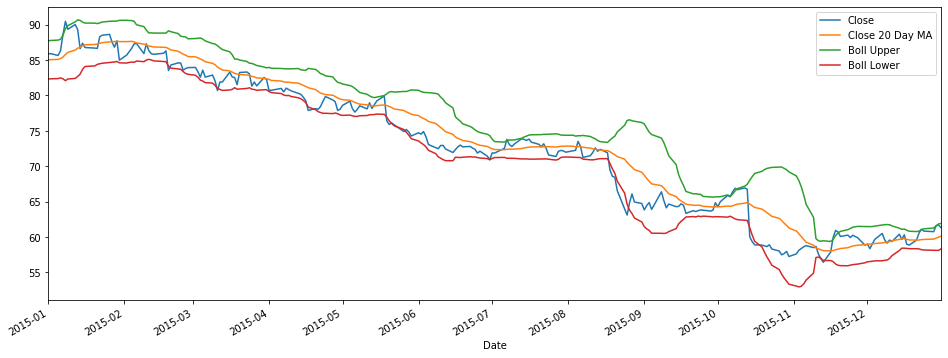

In [16]:
# need to create three new columns in the dataframe
# Close 20 Day MA
df['Close 20 Day MA'] = df['Close'].rolling(20).mean()

# Boll Upper = 20 MA + 2 * std(20)
df['Boll Upper'] = df['Close 20 Day MA'] + 2 * (df['Close'].rolling(20).std())

# Boll Lower = 20 MA - 2 * std(20)
df['Boll Lower'] = df['Close 20 Day MA'] - 2 * (df['Close'].rolling(20).std())

# now plot just a selected date segment
df[['Close', 'Close 20 Day MA', 'Boll Upper', 'Boll Lower']].plot(figsize=(16,6), xlim=('2015-01-01','2015-12-31'))